## Importing ucimlrepo library

In [ ]:
from ucimlrepo import fetch_ucirepo

## Fetching datasets

In [ ]:
HD_main = fetch_ucirepo(id=45)
W_main = fetch_ucirepo(id=109)

In [ ]:
hddf = HD_main.data.original
wdf = W_main.data.original

In [ ]:
hddf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
wdf

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## Cleaning dataset

In [ ]:
hddf = hddf.dropna()
wdf = wdf.dropna()

In [ ]:
hddf_target = hddf['num']
hddf_features = hddf.drop('num',axis=1)
wdf_target = wdf['class']
wdf_features = wdf.drop('class',axis=1)

## Importing libraries for model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import math
from matplotlib import pyplot as plt

In [ ]:
modelHD = DecisionTreeClassifier(criterion="entropy")
modelW = DecisionTreeClassifier(criterion="entropy")

## Splitting datasets for training and testing

In [ ]:
X_trainHD,X_testHD,y_trainHD,y_testHD = train_test_split(hddf_features,hddf_target,test_size=0.2,random_state=10)
X_trainW,X_testW,y_trainW,y_testW = train_test_split(wdf_features,wdf_target,test_size=0.2,random_state=10)

## Fitting Decision Tree Classifier model

In [ ]:
modelHD.fit(X_trainHD,y_trainHD)
modelW.fit(X_trainW,y_trainW)

DecisionTreeClassifier(criterion='entropy')

## Plotting made Decision Trees

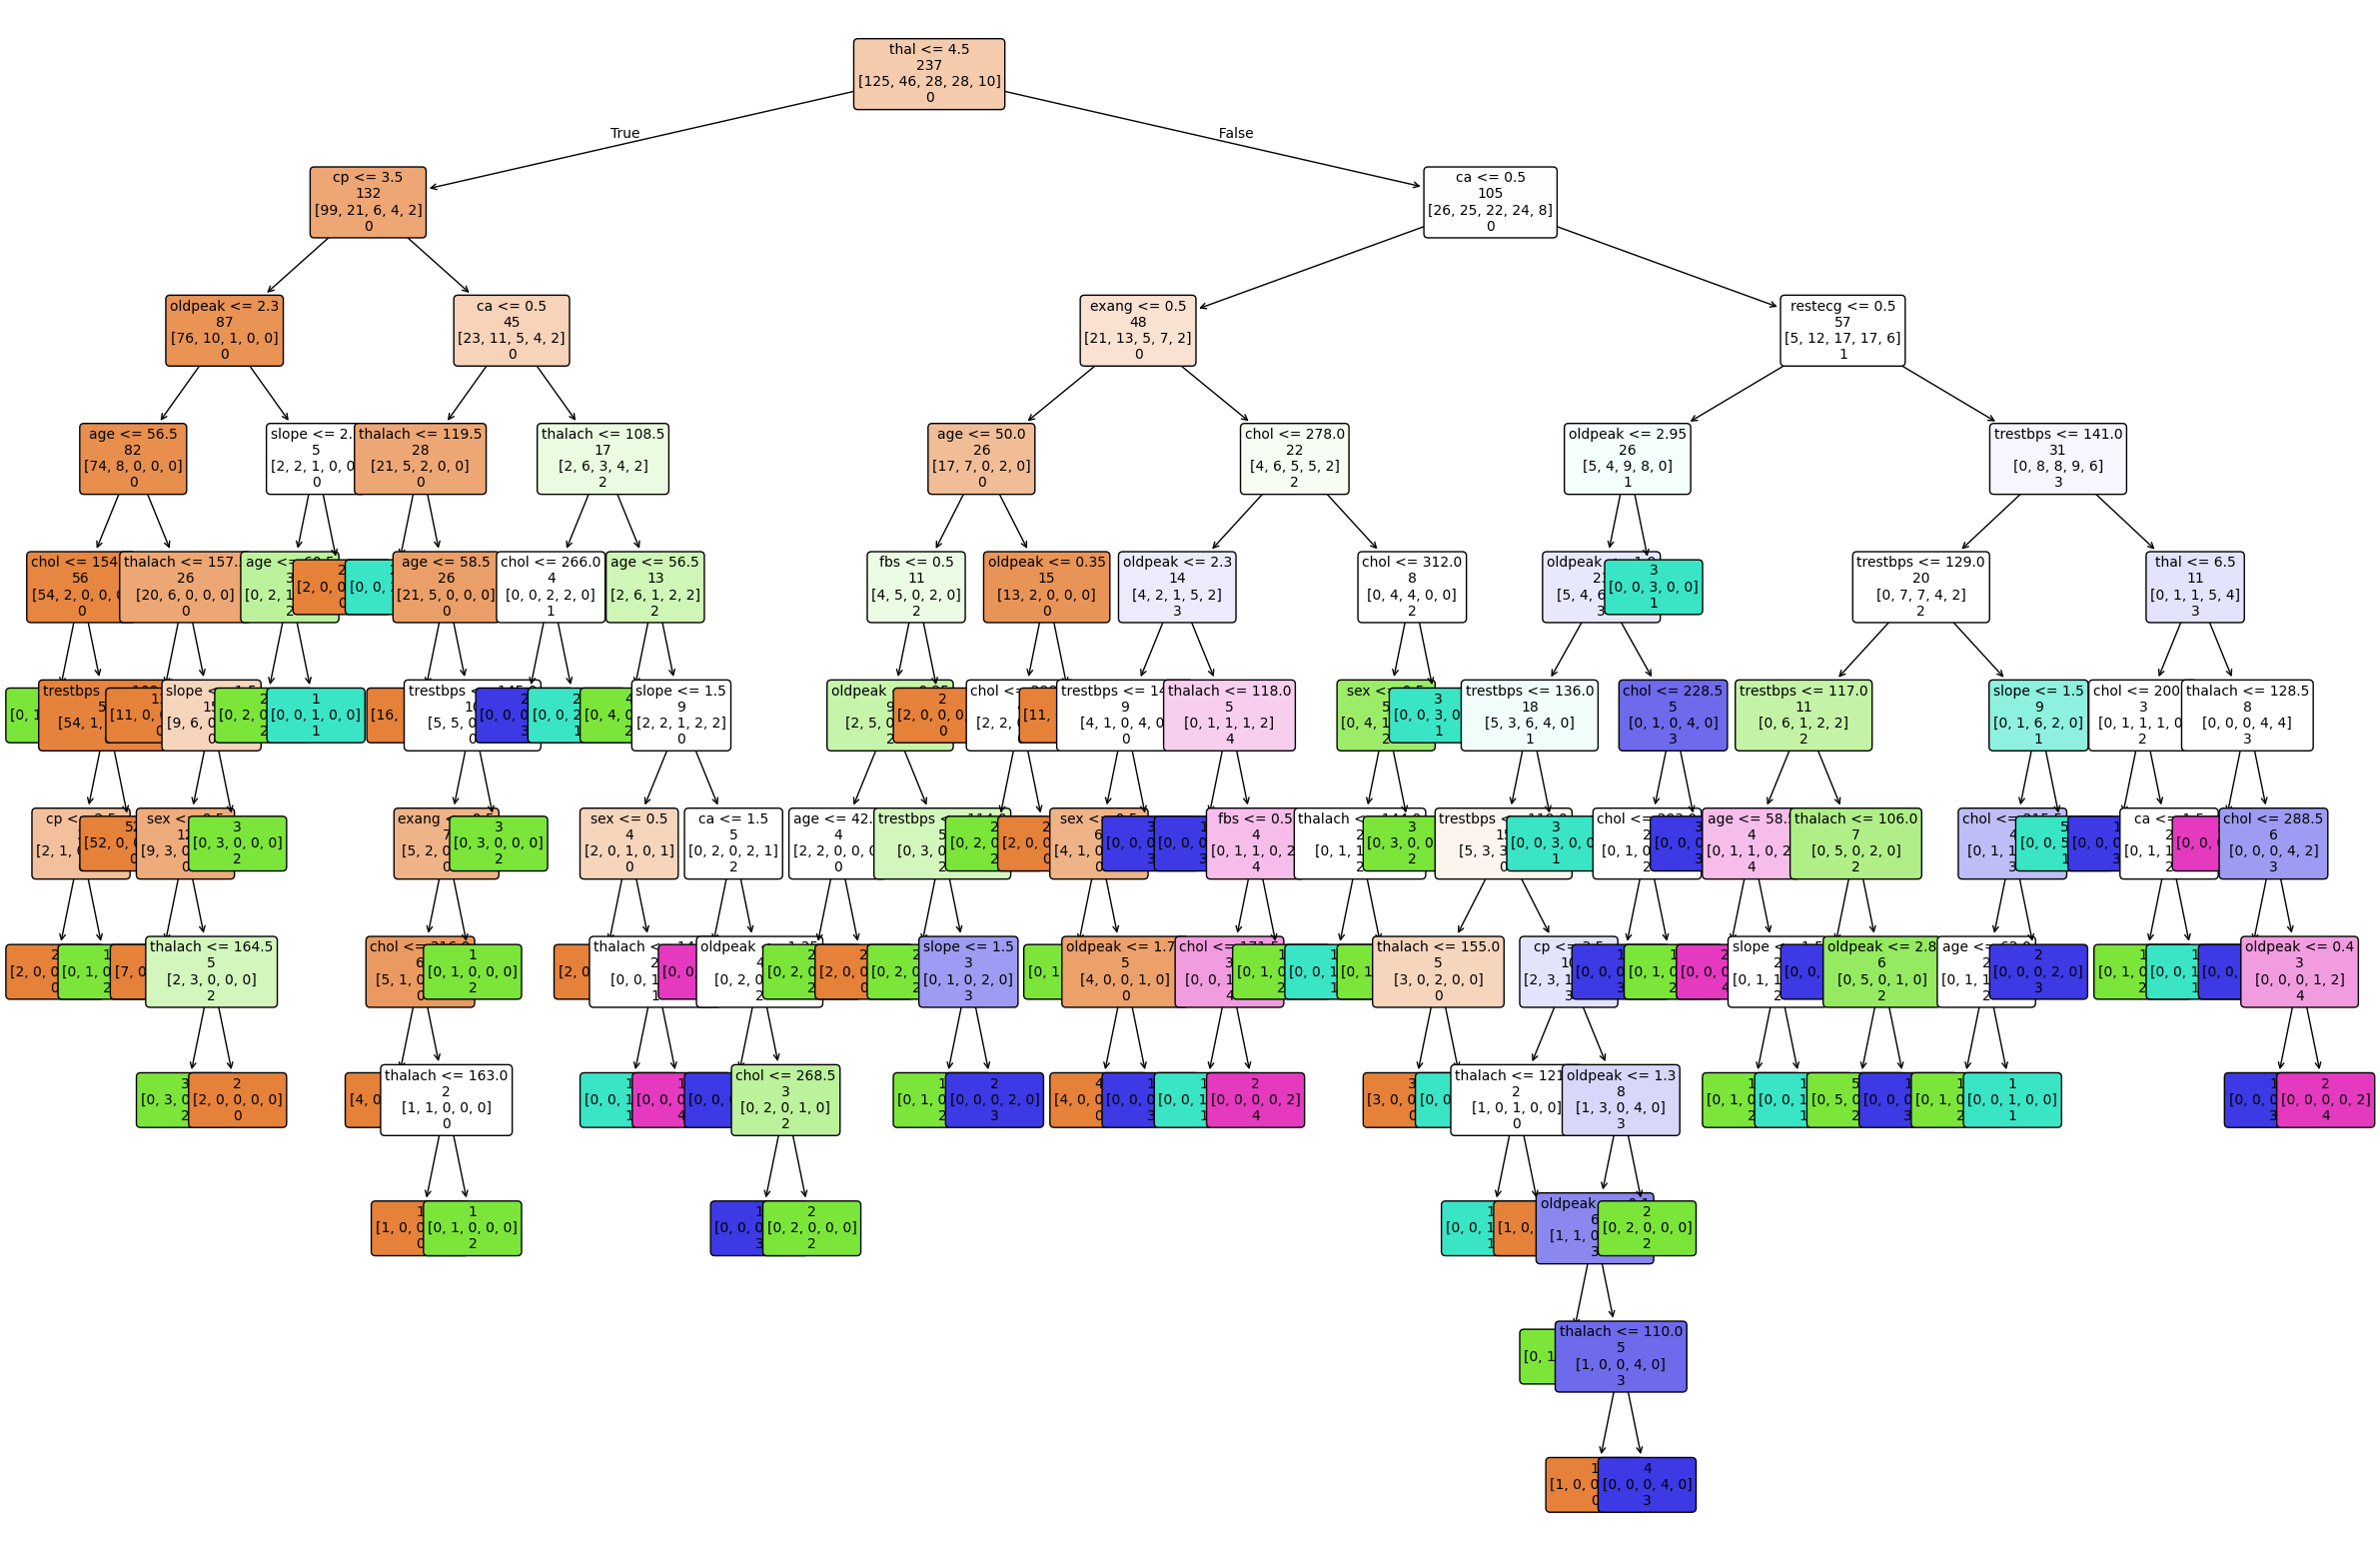

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(
    modelHD,
    filled=True,
    rounded=True,
    class_names=[str(x) for x in hddf_target.unique()],
    feature_names=hddf_features.columns,
    proportion=False,
    impurity=False,
    label="none",
    fontsize=10
  )
plt.show()

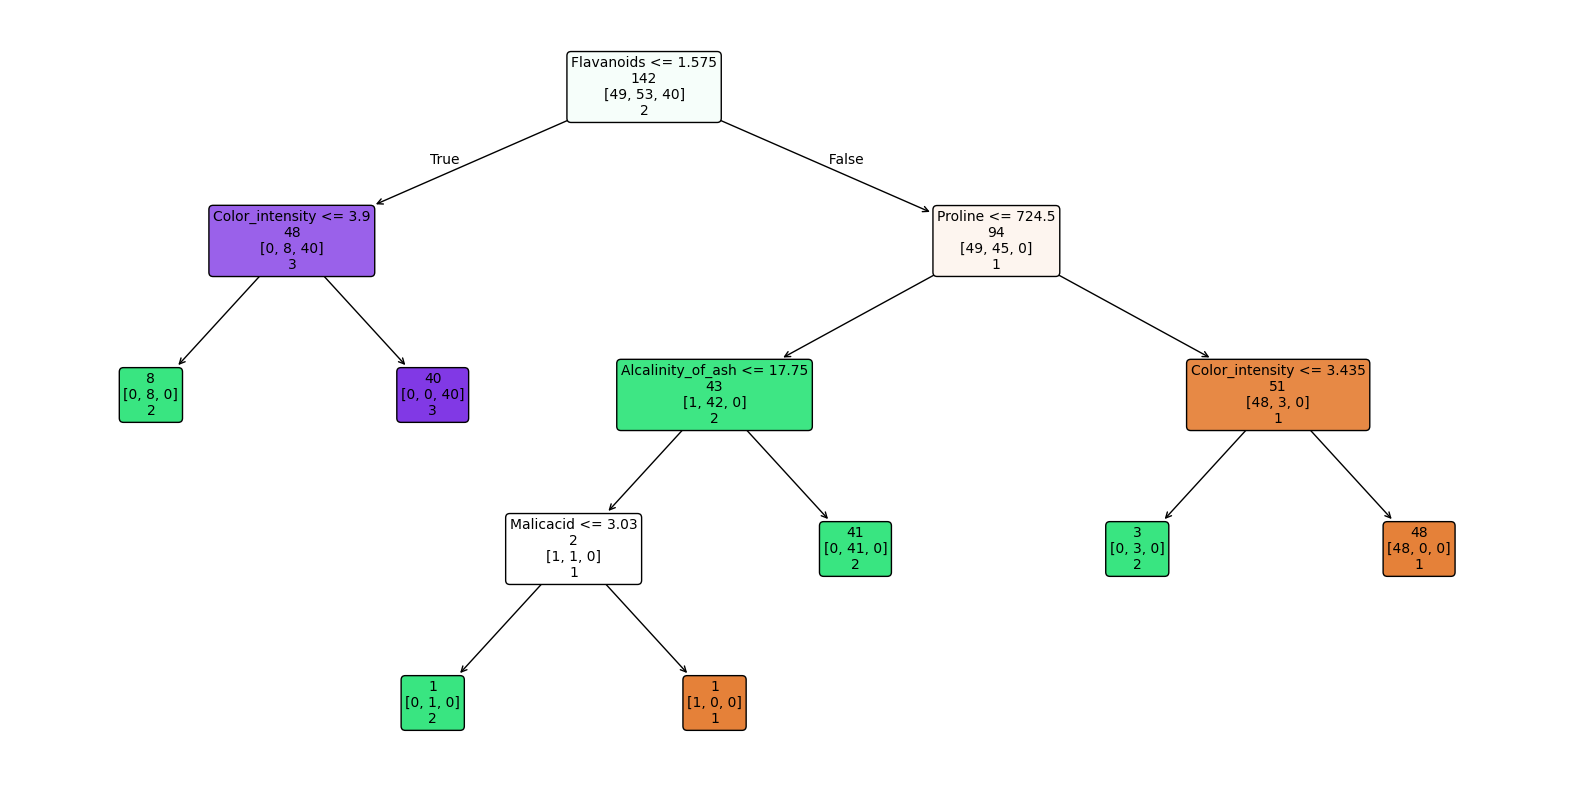

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    modelW,
    filled=True,
    rounded=True,
    class_names=[str(x) for x in wdf_target.unique()],
    feature_names=wdf_features.columns,
    proportion=False,
    label="none",
    impurity=False,
    fontsize=10
  )
plt.show()

## Showing calculated metrics

In [ ]:
HD_accu = accuracy_score(y_testHD,modelHD.predict(X_testHD))
W_accu = accuracy_score(y_testW,modelW.predict(X_testW))
print("Heart Disease data DT model accuracy",round(HD_accu*100,2),"%")
print("Wine data DT model accuracy",round(W_accu*100,2),"%")

Heart Disease data DT model accuracy 45.0 %
Wine data DT model accuracy 94.44 %


In [ ]:
HD_pred = modelHD.predict(X_testHD)
W_pred = modelW.predict(X_testW)

print("Heart Disease Data Metrics:")
print(f"  Accuracy: {accuracy_score(y_testHD, HD_pred)*100:.2f}%")
print(f"  Precision: {precision_score(y_testHD, HD_pred, average='weighted', zero_division=0):.4f}")
print(f"  F1-Score: {f1_score(y_testHD, HD_pred, average='weighted', zero_division=0):.4f}")
print("\nWine Data Metrics:")
print(f"  Accuracy: {accuracy_score(y_testW, W_pred)*100:.2f}%")
print(f"  Precision: {precision_score(y_testW, W_pred, average='weighted', zero_division=0):.4f}")
print(f"  F1-Score: {f1_score(y_testW, W_pred, average='weighted', zero_division=0):.4f}")


Heart Disease Data Metrics:
  Accuracy: 45.00%
  Precision: 0.5568
  F1-Score: 0.4917

Wine Data Metrics:
  Accuracy: 94.44%
  Precision: 0.9444
  F1-Score: 0.9444


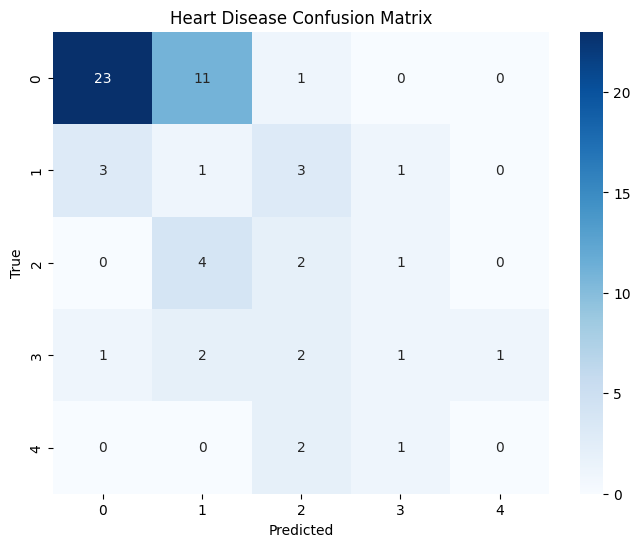

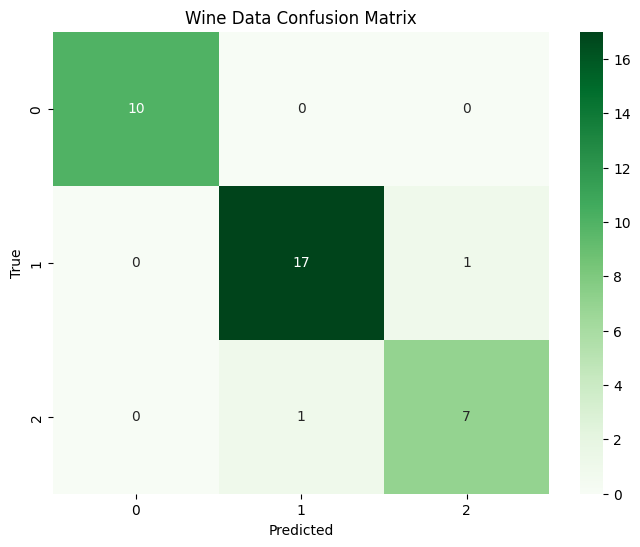

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

HD_cm = confusion_matrix(y_testHD, HD_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(HD_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Heart Disease Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

W_cm = confusion_matrix(y_testW, W_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(W_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Wine Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# WEKA data

## Wine Dataset

### Weka Classification Report: J48 Decision Tree
**Dataset:** Wine

---

## 1. Run Information
* **Scheme:** `weka.classifiers.trees.J48 -C 0.25 -M 2`
* **Instances:** 178
* **Attributes:** 14
* **Test Mode:** 10-fold cross-validation

---

## 2. Classifier Model (J48 Pruned Tree)
*Tree Size: 9 | Number of Leaves: 5*

```text
Flavanoids <= 1.57
|   Color intensity <= 3.8: class2 (13.0)
|   Color intensity > 3.8: class3 (49.0/1.0)
Flavanoids > 1.57
|   Proline <= 720: class2 (54.0/1.0)
|   Proline > 720
|   |   Color intensity <= 3.4: class2 (4.0)
|   |   Color intensity > 3.4: class1 (58.0)
```
## 3. Stratified Cross-Validation Summary

|Metric|Value|
|---|---|
|Correctly Classified Instances|167 (93.8202 %)|
|Incorrectly Classified Instances|11 (6.1798 %)|
|Kappa statistic|0.9058|
|Mean absolute error|0.0486|
|Root mean squared error|0.2019|
|Relative absolute error|11.0723 %|
|Root relative squared error|43.0865 %|

## 4. Detailed Accuracy By Cla

|Class|TP Rate|FP Rate|Precision|Recall|F-Measure|MCC|ROC Area|PRC Area|
|---|---|---|---|---|---|---|---|---|
|class1|0.983|0.034|0.935|0.983|0.959|0.938|0.977|0.942|
|class2|0.944|0.056|0.918|0.944|0.931|0.884|0.937|0.884|
|class3|0.875|0.008|0.977|0.875|0.923|0.899|0.946|0.901|
|Weighted Avg.|0.938|0.036|0.940|0.938|0.938|0.906|0.953|0.908|

## 5. Confusion Matrix
Vertical axis: Actual Class | Horizontal axis: Predicted Class

|Actual \ Predicted|class1 (a)|class2 (b)|class3 (c)|
|---|---|---|---|
|class1 (a)|58|1|0|
|class2 (b)|3|67|1|
|class3 (c)|1|5|42|

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


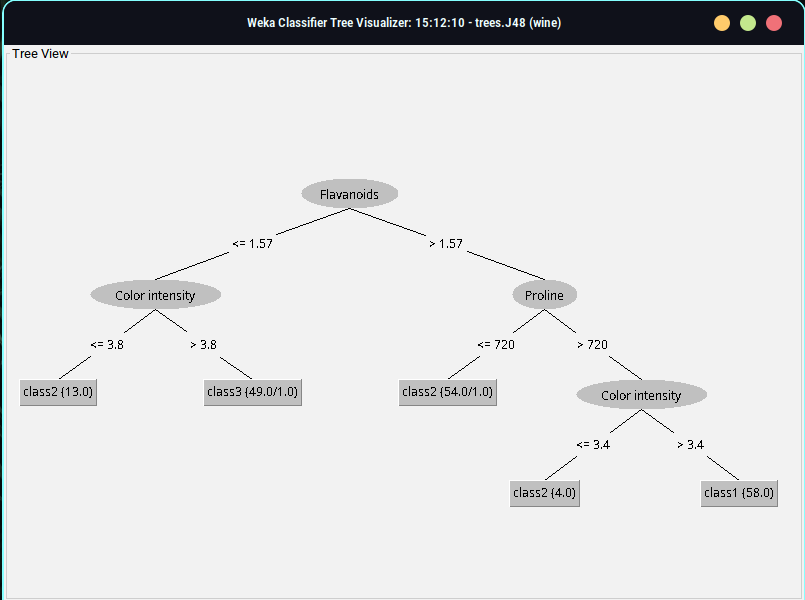

In [ ]:
from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive')

Image('/content/drive/MyDrive/Colab Notebooks/dm/wine.png')


## Heart Disease

### Weka Classification Report: J48 Decision Tree
**Dataset:** Cleveland Heart Disease (`processed.cleveland`)

---

## 1. Run Information
* **Scheme:** `weka.classifiers.trees.J48 -C 0.25 -M 2`
* **Instances:** 303
* **Attributes:** 14
* **Test Mode:** 10-fold cross-validation

---

## 2. Classifier Model (J48 Pruned Tree)
*Tree Size: 67 | Number of Leaves: 34*

```text
thal <= 3
|   thalach <= 117
|   |   cp <= 3: class 0 (4.55)
|   |   cp > 3
|   |   |   exang <= 0: class 2 (3.0/1.0)
|   |   |   exang > 0
|   |   |   |   trestbps <= 140: class 3 (3.0)
|   |   |   |   trestbps > 140: class 2 (2.0)
|   thalach > 117
|   |   ca <= 0: class 0 (110.99/11.55)
|   |   ca > 0
|   |   |   oldpeak <= 2.3
|   |   |   |   cp <= 3: class 0 (28.56/6.0)
|   |   |   |   cp > 3
|   |   |   |   |   sex <= 0: class 0 (4.0/1.0)
|   |   |   |   |   sex > 0
|   |   |   |   |   |   ca <= 1: class 1 (6.0/2.0)
|   |   |   |   |   |   ca > 1: class 3 (2.0/1.0)
|   |   |   oldpeak > 2.3: class 2 (3.0/2.0)
thal > 3
|   cp <= 3
|   |   oldpeak <= 1.9
|   |   |   thal <= 6
|   |   |   |   exang <= 0: class 0 (2.05)
|   |   |   |   exang > 0: class 2 (2.0)
|   |   |   thal > 6
|   |   |   |   thalach <= 109: class 2 (2.0/1.0)
|   |   |   |   thalach > 109: class 0 (30.4/10.0)
|   |   oldpeak > 1.9
|   |   |   slope <= 2
|   |   |   |   age <= 58
|   |   |   |   |   chol <= 227: class 3 (2.0)
|   |   |   |   |   chol > 227: class 4 (2.0)
|   |   |   |   age > 58: class 2 (3.0/1.0)
|   |   |   slope > 2: class 0 (2.0)
|   cp > 3
|   |   ca <= 2
|   |   |   oldpeak <= 0.7
|   |   |   |   fbs <= 0
|   |   |   |   |   restecg <= 1
|   |   |   |   |   |   ca <= 0
|   |   |   |   |   |   |   trestbps <= 136: class 0 (4.0)
|   |   |   |   |   |   |   trestbps > 136: class 1 (3.0/1.0)
|   |   |   |   |   |   ca > 0
|   |   |   |   |   |   |   chol <= 244: class 2 (3.0)
|   |   |   |   |   |   |   chol > 244: class 0 (2.0/1.0)
|   |   |   |   |   restecg > 1: class 1 (7.0/2.0)
|   |   |   |   fbs > 0: class 3 (2.89/0.89)
|   |   |   oldpeak > 0.7
|   |   |   |   thal <= 6
|   |   |   |   |   exang <= 0: class 0 (3.0/2.0)
|   |   |   |   |   exang > 0: class 2 (5.06/2.0)
|   |   |   |   thal > 6
|   |   |   |   |   age <= 58
|   |   |   |   |   |   chol <= 302: class 3 (24.39/11.39)
|   |   |   |   |   |   chol > 302: class 2 (6.0/1.0)
|   |   |   |   |   age > 58
|   |   |   |   |   |   sex <= 0: class 3 (3.0/1.0)
|   |   |   |   |   |   sex > 0
|   |   |   |   |   |   |   thalach <= 139
|   |   |   |   |   |   |   |   chol <= 206: class 4 (2.0)
|   |   |   |   |   |   |   |   chol > 206: class 1 (4.0/1.0)
|   |   |   |   |   |   |   thalach > 139: class 2 (11.0/2.0)
|   |   ca > 2
|   |   |   exang <= 0: class 4 (6.0/2.0)
|   |   |   exang > 0: class 3 (4.11/1.11)
```
## 3. Stratified Cross-Validation Summary

|Metric|Value|
|---|---|
|Correctly Classified Instances|159 (52.4752 %)|
|Incorrectly Classified Instances|144 (47.5248 %)|
|Kappa statistic|0.223|
|Mean absolute error|0.2105|
|Root mean squared error|0.4011|
|Relative absolute error|81.2618 %|
|Root relative squared error|111.6521 %|

## 4. Detailed Accuracy By Class

|Class|TP Rate|FP Rate|Precision|Recall|F-Measure|MCC|ROC Area|PRC Area|
|---|---|---|---|---|---|---|---|---|
|Class 0|0.860|0.345|0.746|0.860|0.799|0.529|0.756|0.710|
|Class 2|0.194|0.097|0.212|0.194|0.203|0.101|0.454|0.143|
|Class 1|0.145|0.149|0.178|0.145|0.160|-0.004|0.500|0.195|
|Class 3|0.057|0.082|0.083|0.057|0.068|-0.030|0.374|0.115|
|Class 4|0.077|0.038|0.083|0.077|0.080|0.041|0.548|0.050|
|Weighted Avg.|0.525|0.237|0.474|0.525|0.497|0.296|0.621|0.452|

## 5. Confusion Matrix
Vertical axis: Actual Class | Horizontal axis: Predicted Class

|Actual \ Predicted|Class 0 (a)|Class 2 (b)|Class 1 (c)|Class 3 (d)|Class 4 (e)|
|---|---|---|---|---|---|
|Class 0 (a)|141|3|14|4|2|
|Class 2 (b)|10|7|10|8|1|
|Class 1 (c)|29|9|8|5|4|
|Class 3 (d)|8|11|10|2|4|
|Class 4 (e)|1|3|3|5|1|

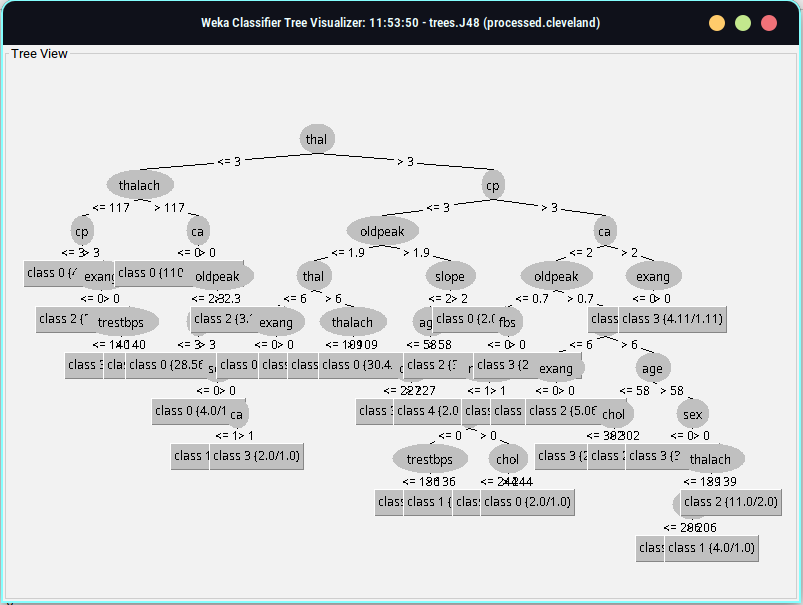

In [ ]:
Image("/content/drive/MyDrive/Colab Notebooks/dm/heartdisease.png")